# Set up
Import Python libraries

In [1]:
import sys

import numpy as np

from astropy import constants
from astropy import units

from matplotlib import pyplot as plt
import matplotlib

# Support for units in plots
from astropy.visualization import quantity_support
quantity_support()

<astropy.visualization.units.quantity_support.<locals>.MplQuantityConverter at 0x787eb3c286d0>

In [2]:
pypath = '/content/drive/MyDrive/Computing/Python/utilities'
sys.path.append(pypath)

In [3]:
from nres_data import NRESObservation
from phoenix_data import PhoenixTemplate
import spec_tools

# Load and prep NRES spectrum of 4 Comae

Store stellar spectra in list of objects `obslist`

In [4]:
# Specify path to NRES spectrum files
filepath = '/content/drive/MyDrive/Research/Binary Stars/LCO Spectra/4 Comae Berenices/'

In [5]:
# Change directory/folder
%cd {filepath}

/content/drive/MyDrive/Research/Binary Stars/LCO Spectra/4 Comae Berenices


In [6]:
# Store list of FITS filenames in 'filenames'
filenames = !ls *.fz

In [7]:
# Inspect this list to ensure the correct observations are listed
filenames

['elpnrs02-fa17-20250406-0016-e92-1d.fits.fz',
 'elpnrs02-fa17-20250407-0018-e92-1d.fits.fz',
 'elpnrs02-fa17-20250424-0016-e92-1d.fits.fz',
 'elpnrs02-fa17-20250429-0017-e92-1d.fits.fz',
 'elpnrs02-fa17-20250525-0019-e92-1d.fits.fz',
 'tlvnrs04-fa18-20250716-0017-e92-1d.fits.fz']

In [8]:
# Create observation objects
obslist = []
for filename in filenames:
  obs = NRESObservation(filepath, filename)
  obslist.append(obs)

In [9]:
# Load data, process observation parameters, prepare spectra
for obs in obslist:
  # Retrieve wavelength and flux arrays from FITS file
  obs.read_fluxfile()
  # Identify telescope location, retrieve lat/lon/elevation
  obs.get_earthlocation()
  # Calculate observation mid-exposure and identify sky coordinates
  obs.get_observingparams()
  # Calculate light-travel offset and RV offset to SS barycenter
  obs.get_barycorrections()
  # Join echelle orders 71-96 into single spectrum for each observation
  obs.join_orders(71,96)

NRES fiber for sky is 0.
Reading spectrum file elpnrs02-fa17-20250406-0016-e92-1d.fits.fz.
Barycenter time of observation is 2025-04-07T07:47:32.459
Barycentric velocity correction is -11.459 km/s.
NRES fiber for sky is 0.
Reading spectrum file elpnrs02-fa17-20250407-0018-e92-1d.fits.fz.
Barycenter time of observation is 2025-04-08T05:01:41.270
Barycentric velocity correction is -11.576 km/s.
NRES fiber for sky is 0.
Reading spectrum file elpnrs02-fa17-20250424-0016-e92-1d.fits.fz.
Barycenter time of observation is 2025-04-25T04:06:28.895
Barycentric velocity correction is -18.001 km/s.
NRES fiber for sky is 0.
Reading spectrum file elpnrs02-fa17-20250429-0017-e92-1d.fits.fz.
Barycenter time of observation is 2025-04-30T06:16:25.390
Barycentric velocity correction is -19.876 km/s.
NRES fiber for sky is 2.
Reading spectrum file elpnrs02-fa17-20250525-0019-e92-1d.fits.fz.
Barycenter time of observation is 2025-05-26T05:11:18.470
Barycentric velocity correction is -25.688 km/s.
NRES fiber

# Load PHOENIX template file

Store template data in object `template`

In [10]:
# Specify PHOENIX file and create object to hold template spectrum
template = PhoenixTemplate(4500,3.00)

In [11]:
template.prepare_template()

** Trying to read ftp://phoenix.astro.physik.uni-goettingen.de/HiResFITS/WAVE_PHOENIX-ACES-AGSS-COND-2011.fits
   Wavelength file read successfully.
** Trying to read ftp://phoenix.astro.physik.uni-goettingen.de/HiResFITS/PHOENIX-ACES-AGSS-COND-2011/Z-0.0/lte04500-3.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits
   Flux file read successfully: Teff = 4500.0, log(g) = 3.0, [Fe/H] = 0.0
Model flux normalized.


# Process spectra

In [12]:
for obs in obslist:
  print(f"** Analyzing observation at {obs.obssite} on {obs.obstime}")
  spec_tools.find_velocity(obs, template)

** Analyzing observation at mcdonald on 2025-04-07T07:39:32.525
Coarse search done, best-fit velocity is +40.0 km/s.
Medium search done, best-fit velocity is +35.0 km/s.
Fine search done, best velocity estimate is +34.584 km/s.
Estimate of velocity uncertainty is 0.0037 km/s.
** Analyzing observation at mcdonald on 2025-04-08T04:53:44.269
Coarse search done, best-fit velocity is +40.0 km/s.
Medium search done, best-fit velocity is +35.0 km/s.
Fine search done, best velocity estimate is +35.004 km/s.
Estimate of velocity uncertainty is 0.0036 km/s.
** Analyzing observation at mcdonald on 2025-04-25T03:59:45.191
Coarse search done, best-fit velocity is +40.0 km/s.
Medium search done, best-fit velocity is +48.0 km/s.
Fine search done, best velocity estimate is +47.828 km/s.
Estimate of velocity uncertainty is 0.0050 km/s.
** Analyzing observation at mcdonald on 2025-04-30T06:10:09.455
Coarse search done, best-fit velocity is +60.0 km/s.
Medium search done, best-fit velocity is +51.0 km/s.

In [13]:
for obs in obslist:
  obs.get_radialvelocity()

In [14]:
for obs in obslist:
  print(obs.radialvelocity)

23.124025265269967
23.42701129230887
29.824468587056355
31.64061966393049
37.94750195755426
40.51318954056522


In [15]:
rvlist = [obs.radialvelocity for obs in obslist]
jdlist = [obs.bjd_tdb.jd for obs in obslist]

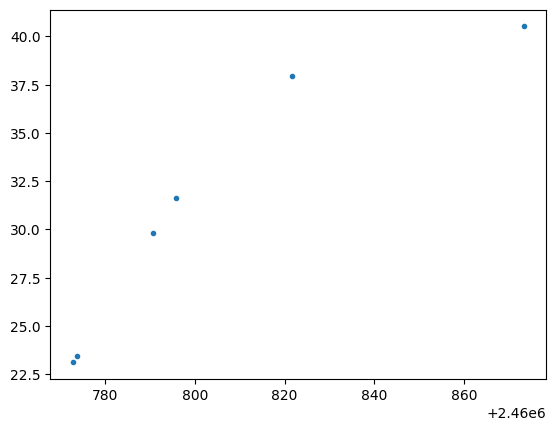

In [16]:
plt.plot(jdlist, rvlist, '.')